In [17]:
# https://dev.to/1n0t/matplotlib-heatmap-calendar-3kbo

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from datetime import date
from datetime import datetime

import os

In [2]:
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [3]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)

In [5]:
energy = energy.to_list()

In [6]:
end_ = date.today()  # yyyy-mm-dd
start_ = datetime(end_.year, end_.month - 1, end_.day)
data = yf.download(energy, start=start_, end=end_, interval="1wk")

[*********************100%%**********************]  86 of 86 completed


In [7]:
start_

datetime.datetime(2023, 9, 30, 0, 0)

In [8]:
df = data.Close
df

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,33.369999,24.070000,40.830002,36.681999,38.098999,48.805000,15.140,33.380001,20.490000,21.493999,...,24.100000,34.419998,26.714001,16.072001,120.070000,25.959999,12.080,88.910004,85.730003,139.449997
2023-10-09,33.720001,24.910000,42.389999,37.875000,39.113998,51.174999,15.655,35.070000,21.230000,21.503000,...,25.110001,35.964001,27.952999,16.275999,125.779999,25.709999,12.190,94.309998,89.589996,148.559998
2023-10-16,30.580000,25.040001,42.840000,37.465000,38.877998,50.625000,15.798,35.279999,21.230000,20.299999,...,24.820000,35.729000,27.705999,15.681000,126.440002,25.302999,11.940,92.980003,90.260002,150.110001
2023-10-23,29.510000,24.570000,41.730000,36.542999,38.035999,49.375999,15.450,34.150002,20.700001,19.586000,...,24.200001,34.816002,26.924999,15.435000,119.150002,24.968000,11.887,88.290001,84.629997,143.899994


## Calcular retornos

In [9]:
returns = df.pct_change()
returns

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-09,0.010489,0.034898,0.038207,0.032523,0.026641,0.048561,0.034016,0.050629,0.036115,0.000419,...,0.041909,0.044858,0.046380,0.012693,0.047556,-0.00963,0.009106,0.060736,0.045025,0.065328
2023-10-16,-0.093120,0.005219,0.010616,-0.010825,-0.006034,-0.010747,0.009135,0.005988,0.000000,-0.055946,...,-0.011549,-0.006534,-0.008836,-0.036557,0.005247,-0.01583,-0.020509,-0.014102,0.007479,0.010434
2023-10-23,-0.034990,-0.018770,-0.025910,-0.024610,-0.021657,-0.024672,-0.022028,-0.032029,-0.024965,-0.035172,...,-0.024980,-0.025553,-0.028189,-0.015688,-0.057656,-0.01324,-0.004439,-0.050441,-0.062375,-0.041370


In [10]:
values = returns.iloc[-1].sort_values(ascending=False)
val_max = values.max()
val_min = values.min()
values

NRGD    0.208375
DUG     0.136364
ERY     0.134827
DRIP    0.088935
RNWZ    0.020158
          ...   
TAN    -0.067623
GUSH   -0.080803
ERX    -0.121423
DIG    -0.125058
NRGU   -0.182284
Name: 2023-10-23 00:00:00, Length: 86, dtype: float64

In [11]:
values.values

array([ 0.2083745 ,  0.13636362,  0.13482694,  0.08893481,  0.02015769,
        0.01715041,  0.01050265,  0.00433839,  0.        , -0.00059188,
       -0.00443882, -0.00632184, -0.00949487, -0.00968552, -0.01015157,
       -0.0104247 , -0.01252734, -0.0132395 , -0.01568773, -0.01714066,
       -0.01761852, -0.01862623, -0.01877002, -0.01912499, -0.01956525,
       -0.02061628, -0.021164  , -0.02165747, -0.02193374, -0.02202814,
       -0.023245  , -0.02366194, -0.02398667, -0.02460966, -0.02467162,
       -0.02496462, -0.02497981, -0.02549938, -0.02552618, -0.02555342,
       -0.02561329, -0.02591038, -0.02652264, -0.02743142, -0.02818885,
       -0.02934707, -0.03082706, -0.0320294 , -0.03352086, -0.03499018,
       -0.03500933, -0.03517236, -0.03697478, -0.03739444, -0.03849576,
       -0.03854298, -0.03867043, -0.04136971, -0.041372  , -0.04182124,
       -0.04307868, -0.04393479, -0.04472926, -0.04493824, -0.04649356,
       -0.04699433, -0.04904052, -0.04944178, -0.05003287, -0.05

In [12]:
test = [round(i*100,2) for i in values]
test[:10]

[20.84, 13.64, 13.48, 8.89, 2.02, 1.72, 1.05, 0.43, 0.0, -0.06]

In [13]:
length = len(test)
# the idea is to shape an a X b matrix
a = int(np.sqrt(length))
b = int(np.ceil(length/a))
m_length = a * b                # matrix "length"

if m_length >= length:
    # compute how many elements need to be add to the array
    diff = abs(length - m_length)
    
    add =np.full(diff, np.nan)
    new_array = np.append(test, add)
    new_array = new_array.reshape(a, b)
    
    # add names to the plot
    names = values.index.to_list()
    add_names =np.full(diff, '---')
    new_names = np.append(names, add_names)
    new_names = new_names.reshape(a, b)

In [14]:
new_array

array([[ 20.84,  13.64,  13.48,   8.89,   2.02,   1.72,   1.05,   0.43,
          0.  ,  -0.06],
       [ -0.44,  -0.63,  -0.95,  -0.97,  -1.02,  -1.04,  -1.25,  -1.32,
         -1.57,  -1.71],
       [ -1.76,  -1.86,  -1.88,  -1.91,  -1.96,  -2.06,  -2.12,  -2.17,
         -2.19,  -2.2 ],
       [ -2.32,  -2.37,  -2.4 ,  -2.46,  -2.47,  -2.5 ,  -2.5 ,  -2.55,
         -2.55,  -2.56],
       [ -2.56,  -2.59,  -2.65,  -2.74,  -2.82,  -2.93,  -3.08,  -3.2 ,
         -3.35,  -3.5 ],
       [ -3.5 ,  -3.52,  -3.7 ,  -3.74,  -3.85,  -3.85,  -3.87,  -4.14,
         -4.14,  -4.18],
       [ -4.31,  -4.39,  -4.47,  -4.49,  -4.65,  -4.7 ,  -4.9 ,  -4.94,
         -5.  ,  -5.04],
       [ -5.26,  -5.63,  -5.66,  -5.69,  -5.76,  -5.77,  -5.84,  -6.12,
         -6.24,  -6.4 ],
       [ -6.42,  -6.76,  -8.08, -12.14, -12.51, -18.23,    nan,    nan,
           nan,    nan]])

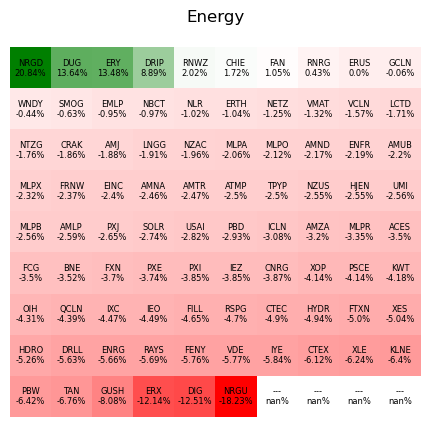

In [23]:
valores = new_array
from  matplotlib.colors import LinearSegmentedColormap
cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# "RdYlGn"
fig, ax = plt.subplots()

# Especificamos paleta de colores a usar y rango de valores a representar.
ax.imshow(valores, cmap=cmap_, vmin=val_min*100, vmax=val_max*100)
# borrar axis labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Reducimos la longitud de las marcas a 0 para que no sean visibles
ax.tick_params(axis=u'both', which=u'both', length=0)
for lado in ['left', 'right', 'bottom', 'top']:
    ax.spines[lado].set_visible(False)

# # # Indicamos las posiciones donde dibujaremos la rejilla    
# ax.set_xticks(np.linspace(-0.5, 8.5, a+1), minor=True)
# ax.set_yticks(np.linspace(-0.5, 9.5, b+1), minor=True)
# # Dibujamos la rejilla de color blanco para que actue como separador.
# ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

for i in range(new_array.shape[0]):
    for j in range(new_array.shape[1]):
        # print(i, j, valores[i,j])
        text = ax.text(j, i, str(new_names[i, j]) + '\n' + str(valores[i, j])+'%',
                       ha="center", va="center", color="k", size=6)

ax.set_title(f"{sector}\n")
        
plt.savefig("Energia.png")
plt.show()


In [16]:
ax.viewLim

Bbox([[-0.5, 8.5], [9.5, -0.5]])